In [2]:
import pandas as pd
import numpy as np 
tau_table = pd.read_csv("tau.csv")
tau_table.head()
auc_table = tau_table[["dataset", "tau", "auc"]]
# auc_table

In [3]:
table = pd.pivot_table(auc_table, values='auc', index=['tau'], columns=['dataset'], aggfunc=np.mean)
table

dataset,ACM,Citeseer,Cora,Pubmed,ogbn-arxiv
tau,,,,,
0.1,0.863345,0.821104,0.862283,0.971482,0.919338
0.2,0.864724,0.825406,0.884477,0.975106,0.919978
0.3,0.850816,0.841395,0.889500,0.971273,0.910507
0.5,0.809669,0.865278,0.896211,0.962915,0.899868
0.6,0.793926,0.867577,0.902377,0.959514,0.894835
0.8,0.781142,0.876226,0.901968,0.952311,0.884838
1.0,0.752708,0.880413,0.890941,0.948105,0.874077
1.5,0.739747,0.881767,0.885668,0.934341,0.860448
2.0,0.736299,0.875016,0.887905,0.929222,0.848899


In [4]:
import pandas as pd
import numpy as np 
alpha_table = pd.read_csv("alpha.csv")
alpha_table.head()
alpha_auc_table = alpha_table[["dataset", "alpha", "auc"]]
# auc_table

In [5]:
table = pd.pivot_table(alpha_auc_table, values='auc', index=['alpha'], columns=['dataset'], aggfunc=np.mean)
table

dataset,ACM,Citeseer,Cora,Pubmed,ogbn-arxiv
alpha,,,,,
0.0,0.758913,0.816345,0.835573,0.957519,0.874025
0.1,0.782839,0.821708,0.862903,0.962604,0.881215
0.2,0.791010,0.840965,0.864631,0.966704,0.890098
0.3,0.815983,0.837295,0.875976,0.966511,0.900356
0.5,0.830937,0.857375,0.881832,0.971354,0.904516
0.6,0.844779,0.860460,0.898147,0.970571,0.909428
0.8,0.854912,0.875626,0.892356,0.972874,0.915422
0.9,0.863984,0.878537,0.892424,0.974365,0.915541
1.0,0.873403,0.873701,0.900547,0.972801,0.919257


In [7]:
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline



In [53]:
import joblib
dataset = 'ACM'

scoreplot_file_path = f"log/{dataset}plotscore/{dataset}_score/epoch320.pkl"
pklfile = joblib.load(scoreplot_file_path)
label = pklfile['label']
score = pklfile['scores']

data = pd.DataFrame({
    "dataset":["ACM"]*len(label),
    "label":label,
    "score":score
})
for dataset in ['Cora', "ogbn-arxiv", "Pubmed", "Citeseer"]:
    if dataset != "ogbn-arxiv":
        scoreplot_file_path = f"log/{dataset}plotscore/{dataset}_score/epoch99.pkl"
    else:
        scoreplot_file_path = f"log/{dataset}plotscore/{dataset}_score/epoch19.pkl"
    pklfile = joblib.load(scoreplot_file_path)
    label = pklfile['label']
    score = pklfile['scores']

    t_data = pd.DataFrame({
        "dataset":[dataset]*len(label),
        "label":np.where(np.array(label)==0, 0, 1),
        "score":score
    })
    data = pd.concat([data, t_data], axis=0)


In [54]:
data.tail()

,dataset,label,score
3322,Citeseer,0.0,-0.585287
3323,Citeseer,0.0,-0.622633
3324,Citeseer,0.0,-0.523030
3325,Citeseer,0.0,-0.684754
3326,Citeseer,0.0,-0.640570


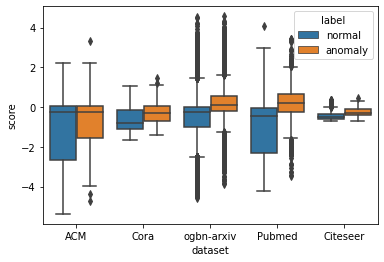

In [55]:
data['label'] = data['label'].astype(int).map({0:'normal', 1:'anomaly'})

ax = sns.boxplot(x="dataset", y="score", hue='label',
                 data=data, linewidth=1.5)
plt.savefig("1.png", dpi=400)